In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [12]:
players<- read_csv("players.csv")

sessions<- read_csv("sessions.csv")

library(ggplot2)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The dataset contains **196 observations**, with each representing an individual who participated in an study involving an online Minecraft server. There is a total of **7 variables**.

### List of Variables

| Variable        | Description |
|----------------|-------------|
| `experience`    | Self-reported skill level in Minecraft. It is either: Beginner, Amateur, Regular, Pro, or Veteran. |
| `subscribe`     | Whether the given participant subscribed to a gaming-related newsletter. Either: Yes or No. |
| `hashedEmail`   | An encrypted version of a participants email (hashed). Each email is unique. |
| `played_hours`  | The total number of hours of Minecraft played during data collection. |
| `name`          | The participant’s name. |
| `gender`        | The participant’s gender. |
| `Age`           | The participant’s age in years. |

| Variable              | Description |
|-----------------------|-------------|
| `hashedEmail`         | An encrypted version of a participants email (hashed). Each email is unique. |
| `start_time`          | The session start time, formatted as `dd/mm/yyyy hh:mm`. |
| `end_time`            | The session end time, formatted as `dd/mm/yyyy hh:mm`. |
| `original_start_time` | The raw numeric timestamp representing the start time (POSIX style format). |
| `original_end_time`   | The raw numeric timestamp representing the end time. |

### Data Collection Process

The data was collected from a free public Minecraft server operated from researchers at the University of British Columbia. The goal of this data collection was to gather behavioral and demographic information of players to better support the development of an AI capable of playing Minecraft.

### Data Quality

Overall, the dataset is high quality and full of insightful information. However, there are some issues with the naming of variables:
- Some variables use `snake_case` (e.g., `played_hours`), others use `camelCase` (e.g., `hashedEmail`), and some are inconsistently capitalized (e.g., `Age`).
- Overall, these issues are minor and do not actually affect the usability of the dataset.

### Question

**Which Has a Greater Effect on a Player Subscribing to a Game Newsletter: Hours Played or Total Experience?**

We examine this by modeling the relationship between the **response variable**:

- `subscribe` (Yes/No)

and the **explanatory variables**:

- `experience` (categorical)
- `total_session_time_hrs` (numeric)
- `average_session_time_hrs` (numeric)
- `num_of_sessions` (numeric) 

### Exploratory Data Analysis and Visualization

In this section, we prepare the `players` and `sessions` datasets for exploratory analysis:

* Load the datasets into R to ensure they can be accessed and manipulated.
* Perform only the minimum necessary wrangling to create a tidy dataset, without additional processing that will be done later.
* Merge `sessions` with `players` using `hashedEmail` to combine demographic and gameplay information.
* Select only the relevant columns: `experience`, `subscribe`, `Age`, `total_session_time_hrs`, `average_session_time_hrs`, and `num_of_sessions`.
* Convert `experience` to an ordered factor representing increasing proficiency: Beginner < Amateur < Regular < Pro < Veteran.

Next steps for exploration:

* Compute the mean value for each quantitative variable (`Age`, `total_session_time_hrs`, `average_session_time_hrs`, `num_of_sessions`) and present the results in a table.
* Create a few visualizations to explore relationships between these variables and the subscription status (`subscribe`).
* Follow visualization best practices: include clear labels, titles, and units of measurement.
* Summarize insights from the plots that are relevant to understanding how player engagement and experience may relate to newsletter subscription.

Age,total_session_time_hrs,average_session_time_hrs,num_of_sessions
<dbl>,<dbl>,<dbl>,<dbl>
21.63636,8.644959,0.5287805,11.6748


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


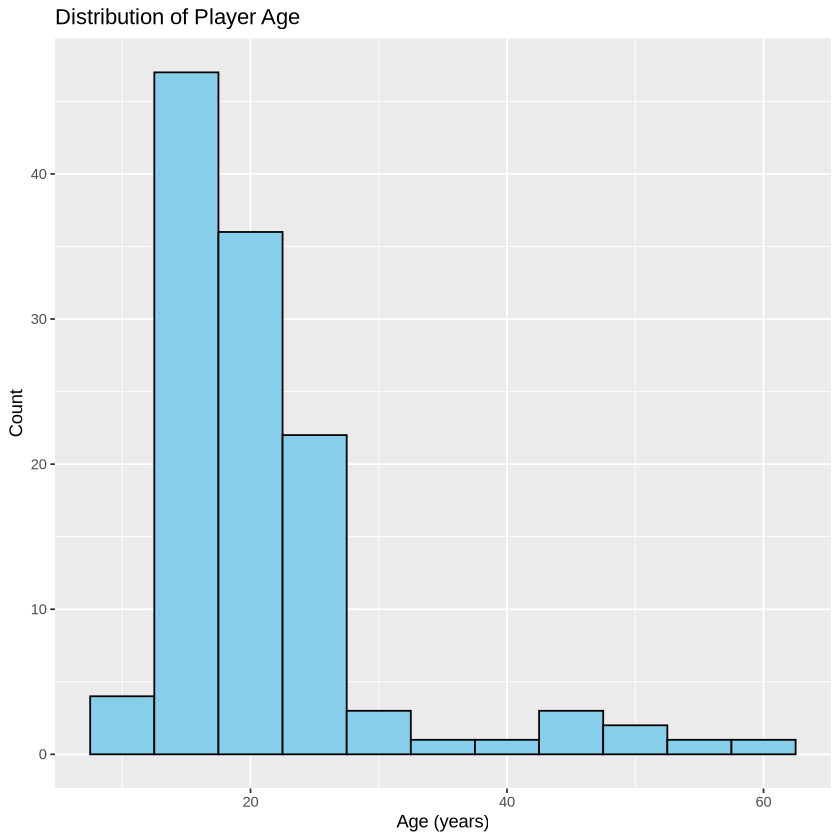

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


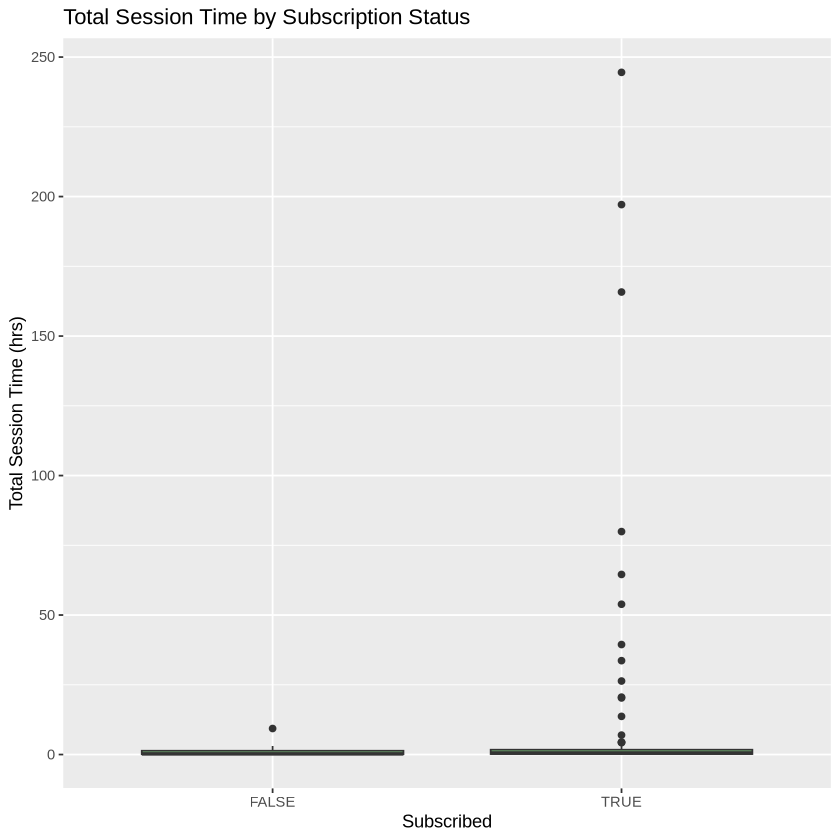

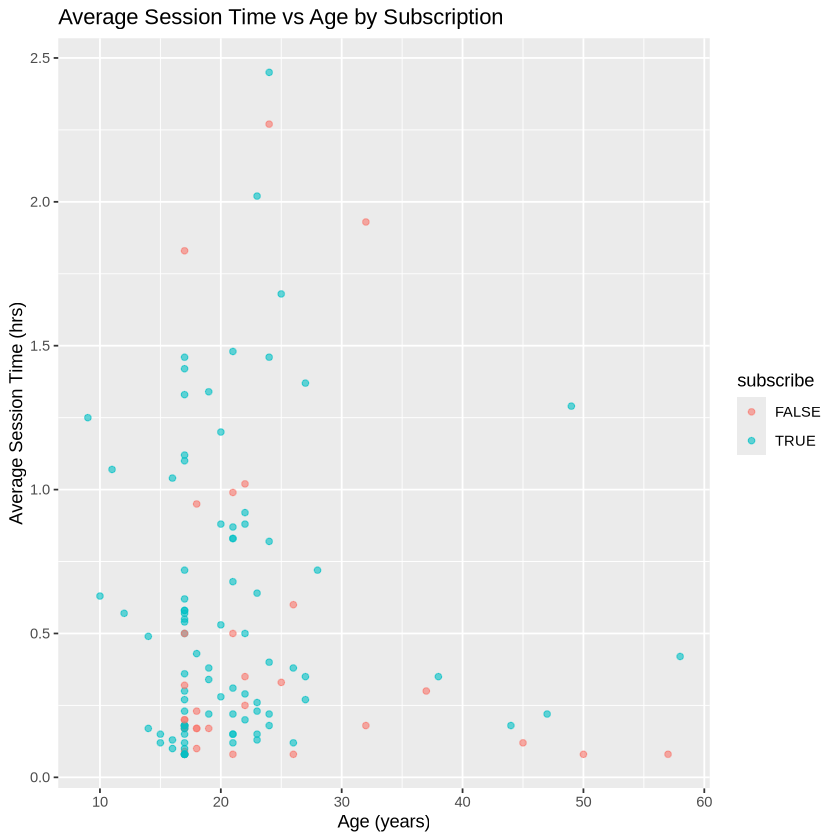

In [13]:
clean_sessions <- sessions |>
    mutate(start_dt = dmy_hm(start_time),
           end_dt = dmy_hm(end_time),
           session_time_in_hrs = as.numeric(end_dt - start_dt) / 60) |>
    group_by(hashedEmail) |>
    summarise(total_session_time_hrs = round(sum(session_time_in_hrs), 2),
              average_session_time_hrs = round(mean(session_time_in_hrs), 2),
              num_of_sessions = n()) |>
    filter(!is.na(total_session_time_hrs) | !is.na(average_session_time_hrs)) |>
    ungroup() |>
    select(hashedEmail, total_session_time_hrs, average_session_time_hrs, num_of_sessions)

clean_players <- merge(players, clean_sessions, by = "hashedEmail") |>
    mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"))) |>
    select(experience, subscribe, Age, total_session_time_hrs, average_session_time_hrs, num_of_sessions)

library(dplyr)
mean_table <- clean_players |>
    summarise(Age = mean(Age, na.rm = TRUE),
              total_session_time_hrs = mean(total_session_time_hrs, na.rm = TRUE),
              average_session_time_hrs = mean(average_session_time_hrs, na.rm = TRUE),
              num_of_sessions = mean(num_of_sessions, na.rm = TRUE))
mean_table

ggplot(clean_players, aes(x = Age)) +
    geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
    labs(title = "Distribution of Player Age", x = "Age (years)", y = "Count")

ggplot(clean_players, aes(x = subscribe, y = total_session_time_hrs)) +
    geom_boxplot(fill = "lightgreen") +
    labs(title = "Total Session Time by Subscription Status", x = "Subscribed", y = "Total Session Time (hrs)")

ggplot(clean_players, aes(x = Age, y = average_session_time_hrs, color = subscribe)) +
    geom_point(alpha = 0.6) +
    labs(title = "Average Session Time vs Age by Subscription", x = "Age (years)", y = "Average Session Time (hrs)")

### Proposed Method for Modeling Newsletter Subscription

To address our research question of predicting whether a player will subscribe to a game newsletter based on experience level and age, we propose using a k-Nearest Neighbors (kNN) classification model.

**Why this method is appropriate:**

* kNN is a simple, non-parametric classification method that can capture relationships between predictors and a categorical outcome.
* It is suitable for our problem because the outcome variable, `subscribe`, is binary (Yes/No), and we want to explore patterns based on experience and age.

**Assumptions required:**

* kNN assumes that similar observations in the predictor space have similar outcomes (i.e., players with similar age and experience are more likely to have the same subscription status).
* The predictors should be scaled similarly, as kNN is distance-based and sensitive to differences in units or ranges.

**Potential limitations or weaknesses:**

* kNN can be affected by irrelevant or highly correlated features.
* The choice of k (number of neighbors) can strongly affect performance, requiring tuning.

**Data processing and model selection plan:**

* Split the dataset into training (75%) and testing (25%) subsets to allow for unbiased evaluation of the model.
* Apply 5-fold cross-validation on the training set to tune the number of neighbors, checking values from 1 to 10.
* Evaluate the final model on the testing set to estimate accuracy.
* The training/testing split ensures we can validate model performance, while cross-validation helps optimize hyperparameters without using the testing data.

This approach provides a clear, interpretable method to explore how player experience and age influence the likelihood of subscribing, while accounting for potential model tuning and validation considerations.